In [4]:
#Installation de la bibliothèque scikit_learn
!pip install scikit_learn

In [6]:
#Installation du package pour l'encodage des variables catégorielles
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 804.8 kB/s eta 0:00:00


**Importation des packages necessaires**

In [8]:
import pandas as pd    # Package dedié à la manipulation de tableaux
import numpy as np     #Package reservé aux calculs

#Les bibliothèques reservées aux graphiques
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Importation des données**

In [9]:
import pandas as pd
data = pd.read_csv('/content/Parkinsons-Telemonitoring-ucirvine.csv')
data.head()

,subject,age,sex,test_time,motor_updrs,total_updrs,jitter,jitter_abs,jitter_rap,jitter_ppq5,...,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda,nhr,hnr,rpde,dfa,ppe
0,1,72,False,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,False,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,False,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,False,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,False,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [10]:
#Les dimensions de notre dataset
data.shape

(5875, 22)

**On a au total 5875 lignes et 22 colonnes**

In [11]:
#Les informations sur notre dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject        5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   bool   
 3   test_time      5875 non-null   float64
 4   motor_updrs    5875 non-null   float64
 5   total_updrs    5875 non-null   float64
 6   jitter         5875 non-null   float64
 7   jitter_abs     5875 non-null   float64
 8   jitter_rap     5875 non-null   float64
 9   jitter_ppq5    5875 non-null   float64
 10  jitter_ddp     5875 non-null   float64
 11  shimmer        5875 non-null   float64
 12  shimmer_db     5875 non-null   float64
 13  shimmer_apq3   5875 non-null   float64
 14  shimmer_apq5   5875 non-null   float64
 15  shimmer_apq11  5875 non-null   float64
 16  shimmer_dda    5875 non-null   float64
 17  nhr            5875 non-null   float64
 18  hnr     

In [13]:
#Vérifier la presence de valeurs manquantes
data.isnull().sum()

subject          0
age              0
sex              0
test_time        0
motor_updrs      0
total_updrs      0
jitter           0
jitter_abs       0
jitter_rap       0
jitter_ppq5      0
jitter_ddp       0
shimmer          0
shimmer_db       0
shimmer_apq3     0
shimmer_apq5     0
shimmer_apq11    0
shimmer_dda      0
nhr              0
hnr              0
rpde             0
dfa              0
ppe              0
dtype: int64

**Pas de valeurs manquantes**

In [14]:
#Présence de lignes doublons
data.duplicated().sum()

0

In [16]:
#AfficherlLes statistiques descriptives de mes données
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
subject,5875.0,NaN,NaN,NaN,21.494128,12.372279,1.0,10.0,22.0,33.0,42.0
age,5875.0,NaN,NaN,NaN,64.804936,8.821524,36.0,58.0,65.0,72.0,85.0
sex,5875,2,False,4008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_time,5875.0,NaN,NaN,NaN,92.863722,53.445602,-4.2625,46.8475,91.523,138.445,215.49
motor_updrs,5875.0,NaN,NaN,NaN,21.296229,8.129282,5.0377,15.0,20.871,27.5965,39.511
total_updrs,5875.0,NaN,NaN,NaN,29.018942,10.700283,7.0,21.371,27.576,36.399,54.992
jitter,5875.0,NaN,NaN,NaN,0.006154,0.005624,0.00083,0.00358,0.0049,0.0068,0.09999
jitter_abs,5875.0,NaN,NaN,NaN,0.000044,0.000036,0.000002,0.000022,0.000035,0.000053,0.000446
jitter_rap,5875.0,NaN,NaN,NaN,0.002987,0.003124,0.00033,0.00158,0.00225,0.00329,0.05754
jitter_ppq5,5875.0,NaN,NaN,NaN,0.003277,0.003732,0.00043,0.00182,0.00249,0.00346,0.06956


In [17]:
#Afficher le tableau de correlation
corr = data.corr()
corr

,subject,age,sex,test_time,motor_updrs,total_updrs,jitter,jitter_abs,jitter_rap,jitter_ppq5,...,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda,nhr,hnr,rpde,dfa,ppe
subject,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,...,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,...,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,...,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,...,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_updrs,0.252919,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,...,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_updrs,0.253643,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,...,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
jitter,0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,...,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
jitter_abs,0.075156,0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,...,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
jitter_rap,0.120339,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,...,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
jitter_ppq5,0.136474,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,...,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491


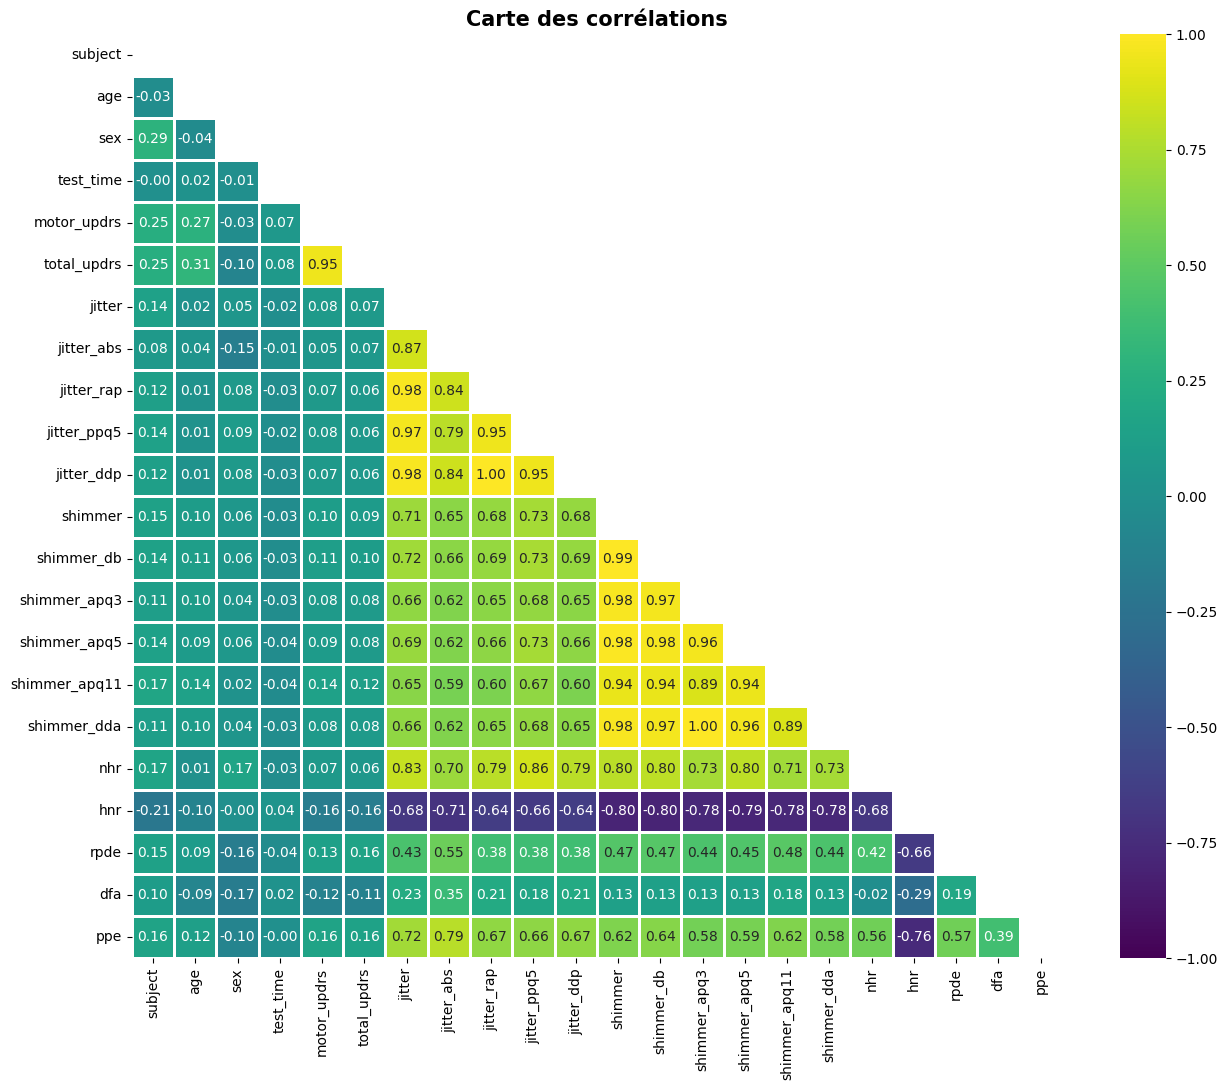

In [18]:
#La  carte de chaleur  des variables
plt.figure(figsize=(15,12))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, center=0, cmap="viridis",
            linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Carte des corrélations', fontsize = 15, fontweight='bold')
plt.show()

In [19]:
# Cibler la correlation entre toutes les features et le label à predir
data.corr()['sex'].sort_values(ascending=False)

sex              1.000000
subject          0.286851
nhr              0.168170
jitter_ppq5      0.087995
jitter_rap       0.076718
jitter_ddp       0.076703
shimmer_apq5     0.064819
shimmer          0.058736
shimmer_db       0.056481
jitter           0.051422
shimmer_dda      0.044938
shimmer_apq3     0.044937
shimmer_apq11    0.023360
hnr             -0.000167
test_time       -0.009805
motor_updrs     -0.031205
age             -0.041602
total_updrs     -0.096559
ppe             -0.099901
jitter_abs      -0.154645
rpde            -0.159262
dfa             -0.165113
Name: sex, dtype: float64

In [21]:
#Définissons notre nouveau dataframe
variables = ['sex','nhr', 'jitter_ppq5', 'jitter_rap', 'jitter_ddp', 'shimmer_apq5', 'shimmer', 'shimmer_db', 'jitter', 'age', 'total_updrs', 'ppe', 'jitter_abs', 'rpde', 'dfa']
df = data[variables]
data.head()

,subject,age,sex,test_time,motor_updrs,total_updrs,jitter,jitter_abs,jitter_rap,jitter_ppq5,...,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda,nhr,hnr,rpde,dfa,ppe
0,1,72,False,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,False,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,False,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,False,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,False,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


**Representation graphiques**

In [23]:
variables_numeriques = ['nhr', 'jitter_ppq5', 'jitter_rap', 'jitter_ddp',
             'shimmer_apq5', 'shimmer', 'shimmer_db', 'jitter',
             'age', 'total_updrs', 'ppe', 'jitter_abs', 'rpde', 'dfa']

In [24]:
# Utiliser une boucle pour créer les histogrammes pour chaque variable numérique
for var in variables_numeriques:
    fig = px.histogram(df, x=var, title=var,log_y=True)
    fig.show()

In [25]:
#Les differentes modalités de sex
df['sex'].unique()

array([False,  True])

In [26]:
#pie chart : diagramme  circulaire de sex
fig = px.pie(df,names ='sex')
fig.show()

In [33]:
#Diagramme à barre du sex
fig = px.bar(df, x='sex',color='sex',color_discrete_map={'False': 'Red', 'True': 'blue'})
fig.show()

In [34]:
df.head()

,sex,nhr,jitter_ppq5,jitter_rap,jitter_ddp,shimmer_apq5,shimmer,shimmer_db,jitter,age,total_updrs,ppe,jitter_abs,rpde,dfa
0,False,0.014290,0.00317,0.00401,0.01204,0.01309,0.02565,0.230,0.00662,72,34.398,0.16006,0.000034,0.41888,0.54842
1,False,0.011112,0.00150,0.00132,0.00395,0.01072,0.02024,0.179,0.00300,72,34.894,0.10810,0.000017,0.43493,0.56477
2,False,0.020220,0.00208,0.00205,0.00616,0.00844,0.01675,0.181,0.00481,72,35.389,0.21014,0.000025,0.46222,0.54405
3,False,0.027837,0.00264,0.00191,0.00573,0.01265,0.02309,0.327,0.00528,72,35.810,0.33277,0.000027,0.48730,0.57794
4,False,0.011625,0.00130,0.00093,0.00278,0.00929,0.01703,0.176,0.00335,72,36.375,0.19361,0.000020,0.47188,0.56122


In [35]:
#Encodage de la variables sex avec le oneHotEncoder
from sklearn.preprocessing import  OneHotEncoder
onehotencoder = OneHotEncoder(sparse=False)
onehotencoder.fit_transform(df[['sex']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [36]:
#Standardisation des variables numérique
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

# Sélectionner les variables numériques à standardiser
variables_numeriques = ['nhr', 'jitter_ppq5', 'jitter_rap', 'jitter_ddp',
                        'shimmer_apq5', 'shimmer', 'shimmer_db', 'jitter',
                        'age', 'total_updrs', 'ppe', 'jitter_abs', 'rpde', 'dfa']

# Appliquer l'encodage de la variable binaire 'sex'
df['sex'] = df['sex'].apply(lambda row: 0 if row == 'False' else 1)

# Créer un ColumnTransformer pour appliquer différentes transformations aux colonnes spécifiées
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numeriques),  # Standardisation des variables numériques
    ], remainder='passthrough')  # Conserver les colonnes non transformées

# Appliquer le ColumnTransformer sur le DataFrame df
df = pd.DataFrame(column_transformer.fit_transform(df), columns=variables_numeriques + ['sex'])

# Afficher les premières lignes du DataFrame transformé
print(df.head())

        nhr  jitter_ppq5  jitter_rap  jitter_ddp  shimmer_apq5   shimmer  \
0 -0.298721    -0.028637    0.327453    0.328505     -0.423356 -0.324594   
1 -0.351965    -0.476212   -0.533746   -0.534825     -0.565592 -0.534016   
2 -0.199370    -0.320767   -0.300038   -0.298983     -0.702426 -0.669115   
3 -0.071754    -0.170682   -0.344859   -0.344871     -0.449763 -0.423692   
4 -0.343370    -0.529814   -0.658604   -0.659682     -0.651413 -0.658276   

   shimmer_db    jitter       age  total_updrs       ppe  jitter_abs  \
0   -0.351642  0.082905  0.815695     0.502745 -0.650658   -0.284242   
1   -0.573156 -0.560793  0.815695     0.549103 -1.218585   -0.756723   
2   -0.564469 -0.238944  0.815695     0.595367 -0.103280   -0.539382   
3    0.069668 -0.155370  0.815695     0.634716  1.237075   -0.485186   
4   -0.586186 -0.498557  0.815695     0.687522 -0.283954   -0.663894   

       rpde       dfa  sex  
0 -1.214066 -1.478500  1.0  
1 -1.055119 -1.247880  1.0  
2 -0.784860 -1.540139  

<ipython-input-36-04d9d710c4c4>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
# Séparation des données en ensembles d'entraînement et de test
X = df.drop('sex', axis=1)  # Caractéristiques
y = df['sex']  # Variable cible

In [40]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Création d'une instance de RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Entraînement du modèle sur les données d'entraînement
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [47]:
# Prédiction des étiquettes de classe pour les données de test
y_pred = clf.predict(X_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [48]:
# Évaluation des performances du modèle
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1175

    accuracy                           1.00      1175
   macro avg       1.00      1.00      1.00      1175
weighted avg       1.00      1.00      1.00      1175



In [49]:
# Optimisation du modèle

from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser le classificateur RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Recherche sur grille des meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés:")
print(grid_search.best_params_)

# Utiliser le meilleur modèle trouvé pour faire des prédictions
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Afficher le rapport de classification
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

Meilleurs hyperparamètres trouvés:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Rapport de classification:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1175

    accuracy                           1.00      1175
   macro avg       1.00      1.00      1.00      1175
weighted avg       1.00      1.00      1.00      1175



le nombre total de prédictions positives du modèle. En d'autres termes, cela mesure la proportion d'exemples prédits comme positifs par le modèle qui sont réellement positifs. Une précision de 1.00 signifie que toutes les prédictions positives du modèle sont correctes.

**Rappel (Recall)**: Le rappel est le nombre de vrais positifs divisé par le nombre total de vrais positifs dans les données. Il mesure la proportion d'exemples positifs dans les données qui ont été correctement identifiés par le modèle. Un rappel de 1.00 signifie que le modèle a identifié correctement tous les exemples positifs.

Score F1 (F1-score) : Le score F1 est la moyenne pondérée de la précision et du rappel. Il est calculé comme 2 * (précision * rappel) / (précision + rappel). Le score F1 atteint sa meilleure valeur à 1 et sa pire valeur à 0. Un score F1 de 1.00 indique une performance parfaite du modèle en termes de précision et de rappel.

Support : Le support est le nombre d'occurrences de chaque classe dans les données de test.

Accuracy (Exactitude) : L'exactitude est le rapport des prédictions correctes (vrais positifs et vrais négatifs) au nombre total d'exemples dans les données de test. Une exactitude de 1.00 signifie que toutes les prédictions du modèle sont correctes.

Ici on a une précision, un rappel, un score F1 et une exactitude de 1.00 pour la classe 0, ce qui signifie que le modèle a prédit correctement toutes les instances de la classe 0 dans les données de test. Cela indique une performance de classification parfaite pour cette classe.